In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#reading dataset csv
dataset=pd.read_csv('PCOS_data_without_infertility.csv')

<AxesSubplot:>

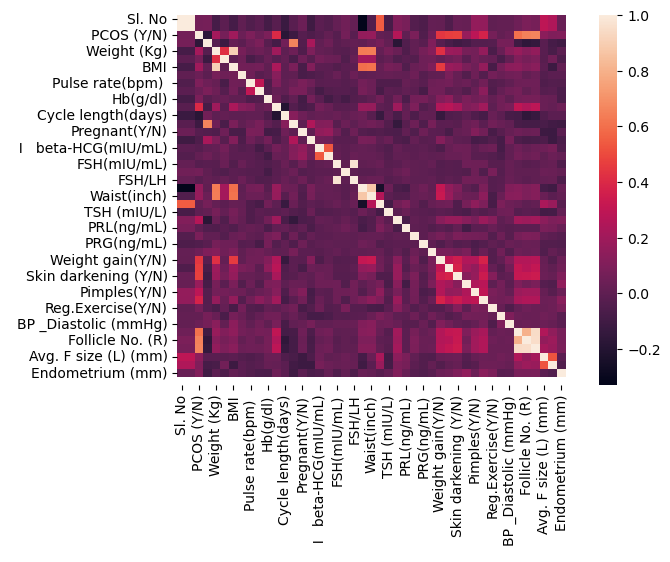

In [17]:
#see heatmap for correlation 
sns.heatmap(dataset.corr( ), annot=False)

In [18]:
#remove SI No. and pateitn file no. bc just patient numbering
#remove unnamed bc extra row
#remove left and right follicle numbers since too correlated to the average number

dataset = dataset.drop('Sl. No', axis=1)
dataset = dataset.drop('Patient File No.', axis=1)
dataset = dataset.drop('Unnamed: 45', axis=1)
dataset = dataset.drop('Follicle No. (R)', axis=1)
dataset = dataset.drop('Follicle No. (L)', axis=1)

In [19]:
#setting target to be the average follicle number (average of L and R)

y=dataset['Follicle No. (Ave)']
X=dataset.loc[:,dataset.columns!="Follicle No. (Ave)"]

In [20]:
#split training and testing data

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

#70% of data is being trained, 30% in test

In [21]:
#find null value

x_train[x_train.isnull().any(axis=1)]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
156,0,27,53.2,158.0,21.310687,13,72,22,10.5,4,...,1,1,0,NaN,1,120,70,11.0,13.0,11.0
457,1,36,66.0,162.0,25.148605,15,72,20,11.0,4,...,0,0,0,0.0,0,120,80,19.0,19.0,8.0


In [22]:
x_test[x_test.isnull().any(axis=1)]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)


In [23]:
# have to remove null value from both x and y 

x_train.dropna(inplace=True)
y_train.drop(156, inplace=True) #inplace assigns to same variable
y_train.drop(457, inplace=True)

In [24]:
#fit training to random forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_depth = 10, min_samples_split = 2, min_samples_leaf = 2, random_state = 50).fit(x_train, y_train)


In [25]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training R2: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing R2: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training R2:  0.8958054841032461
Testing R2:  0.4384512433761526
RMSE for Training Data:  1.3360125489873627
RMSE for Testing Data:  3.0077961044574004


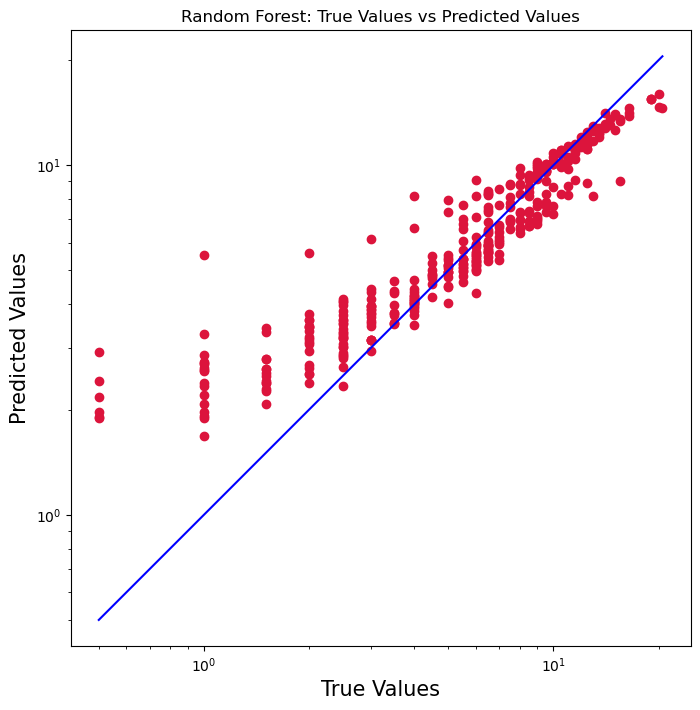

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(y_train, y_pred_train, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train), max(y_train))
p2 = min(min(y_pred_train), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest: True Values vs Predicted Values")
plt.axis('equal')
plt.show()